### Libraries import

In [1]:
import os
import json
from deta import Deta
import pandas as pd
import numpy as np
from datetime import datetime
from dotenv import load_dotenv
from IPython.display import Image

### Load DETA key

In [2]:
load_dotenv("expense_tracker_app/.env")
DETA_KEY = os.getenv("DETA_KEY")

### Initialize DETA: Base & Drive

In [3]:
deta = Deta(DETA_KEY)
db = deta.Base("defects_db")
drive = deta.Drive("defects_imgs")
drive2 = deta.Drive("qa_dash")
ncr_db = deta.Base("ncr_db")

### DETA: Base & Drive functions

In [4]:
def upload_data(image_data, defect_type, details):
    date_time = datetime.now()
    date = date_time.strftime("%m/%d/%Y")
    time = date_time.strftime("%H:%M:%S")
    return db.put({"key": str(date_time.timestamp()), "date": date, "time": time, "image_data": image_data, "defect_type": defect_type, "details": details})

def upload_dash_data(details):
    date_time = datetime.now()
    date = date_time.strftime("%m/%d/%Y")
    time = date_time.strftime("%H:%M:%S")
    return ncr_db.put({"key": str(date_time.timestamp()), "date": date, "time": time, "details": details})

def fetch_data(db_name, key):
    return db_name.get(key)

def fetch_all_data(db_name):
    res = db_name.fetch()
    return res.items

### Example data & upload in Base

In [6]:
# image_data = "new-img"
# defect_type = "Slubs"
# details = {'PO': 'P0X-2929', 'K1': '13200046', 'Qty': 300}
# upload_data(image_data, defect_type, details)

In [9]:
test = 'trial-1'
upload_dash_data(test)

{'date': '08/09/2023',
 'details': 'trial-1',
 'key': '1691603406.303076',
 'time': '23:20:06'}

### Fetch all data: ncr_db

In [5]:
fetch_all_data(ncr_db)

[{'date': '08/09/2023',
  'details': 'trial-1',
  'key': '1691603406.303076',
  'time': '23:20:06'}]

### Fetch all data: db (defects_db)

In [16]:
fetch_all_data(db)

[{'Article': 'A121A041',
  'Customer': 'Uniqlo',
  'Date': '10-07-2023',
  'Defect_type': 'Leno break',
  'PO': 'F010225085',
  'Quantity': 2442,
  'Remarks': 'Tight leno on both sides. Updated to MSML - Govind ji.',
  'key': '1689357575.939281'},
 {'Article': 'A140F896',
  'Customer': 'Aathava',
  'Date': '10-07-2023',
  'Defect_type': 'Droppings ',
  'PO': 'FMW0003706, F010225309',
  'Quantity': 8600,
  'Remarks': 'Updated to MSML. Rolls sent back.',
  'key': '1689357822.098139'},
 {'Article': 'A121A041',
  'Customer': 'Uniqlo',
  'Date': '12-07-2023',
  'Defect_type': 'Lining, ',
  'PO': 'F010225216',
  'Quantity': 2886,
  'Remarks': 'Piece to piece warp lining observed.',
  'key': '1689357901.968612'},
 {'Article': '15001021',
  'Customer': 'Raymonds Ltd.',
  'Date': '13-07-2023',
  'Defect_type': 'S-bowing+Skew',
  'PO': 'F0A0020764',
  'Quantity': 1570,
  'Remarks': '1.Fabric processed in stenter(2times) = No improvement, 2.100m processed in Jet-Stenter(3rd time) = 4%skew & 2.9%b

### Fetch base data into `df`

In [16]:
defects_data = fetch_all_data(db)
df = pd.DataFrame(defects_data)

### View fetched data in JSON format

In [22]:
defects_data

[{'Article': 'A121A041',
  'Customer': 'Uniqlo',
  'Date': '10-07-2023',
  'Defect_type': 'Leno break',
  'PO': 'F010225085',
  'Quantity': 2442,
  'Remarks': 'Tight leno on both sides. Updated to MSML - Govind ji.',
  'key': '1689357575.939281'},
 {'Article': 'A140F896',
  'Customer': 'Aathava',
  'Date': '10-07-2023',
  'Defect_type': 'Droppings ',
  'PO': 'FMW0003706, F010225309',
  'Quantity': 8600,
  'Remarks': 'Updated to MSML. Rolls sent back.',
  'key': '1689357822.098139'},
 {'Article': 'A121A041',
  'Customer': 'Uniqlo',
  'Date': '12-07-2023',
  'Defect_type': 'Lining, ',
  'PO': 'F010225216',
  'Quantity': 2886,
  'Remarks': 'Piece to piece warp lining observed.',
  'key': '1689357901.968612'},
 {'Article': '15001021',
  'Customer': 'Raymonds Ltd.',
  'Date': '13-07-2023',
  'Defect_type': 'S-bowing+Skew',
  'PO': 'F0A0020764',
  'Quantity': 1570,
  'Remarks': '1.Fabric processed in stenter(2times) = No improvement, 2.100m processed in Jet-Stenter(3rd time) = 4%skew & 2.9%b

### Convert & Sort Date column

In [30]:
df['Date'] = pd.to_datetime(df.Date, format='%d-%m-%Y')
df.sort_values(by=["Date"], ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

Article  \
18                    26000004/12-13785   
15  16009, 14000313, 14000059, 16000185   
16                             A150D587   
17                             A150D889   
13                             A121A041   
14                      A145A438/PC-5SF   
12                             A150D155   
11                             14000861   
10                             A150E057   
9                              14000396   
8                              14000923   
7                     150208-BAMM-CT-SF   
6                              A145A438   
5                              A150B321   
4                              A160C084   
3                              15001021   
2                              A121A041   
1                              A140F896   
0                              A121A041   

                                             Customer       Date  \
18                              STYLEM TAKISADA-OSAKA 2023-08-11   
15  Sanya international/Brandix Apparels/Modelama ... 2023-08-09   
16                                   Laguna clothing  2023-08-07   
17                         Vamani Overseas(Target US) 2023-08-01   
13                                             Uniqlo 2023-07-31   
14            Aditya Birla Fashion and Retail Limited 2023-07-30   
12                   PT Ungaran Sari Garments/PVH(CK) 2023-07-27   
11                               Modelama Exports/MGF 2023-07-26   
10                                     BLUE BLEND INC 2023-07-24   
9                           Aditya Birla/ Allen Solly 2023-07-22   
8                                       Raymonds Ltd. 2023-07-19   
7                                        Aditya birla 2023-07-15   
6                                        Aditya birla 2023-07-15   
5                       Aditya Birla Fashion & Retail 2023-07-14   
4                                      Indian Terrain 2023-07-13   
3                                       Raymonds Ltd. 2023-07-13   
2                                              Uniqlo 2023-07-12   
1                                             Aathava 2023-07-10   
0                                              Uniqlo 2023-07-10   

                                          Defect_type  \
18                                Lining & Loose roll   
15                                         Neps Stain   
16                             Contamination/Loom fly   
17  Fibre migration & Bubbling(Differential shrink...   
13                                             Lining   
14                                       Oil Dropping   
12                                     Fly Deposition   
11                                        Warp Lining   
10                                       Shade change   
9                                       Mending Marks   
8                 Back-side emboss effect/rubber mark   
7                                             Patta,    
6                                           Oil Stain   
5                            Loops, Temple Impression   
4                                              Neps,    
3                                       S-bowing+Skew   
2                                            Lining,    
1                                          Droppings    
0                                          Leno break   

                                                   PO Quantity  \
18                                         F0Z0005037      757   
15  P010021212, P0X0005009, P0X0005022, P0X0005014...    31193   
16                                         F010226718     1359   
17                                         F0A0020956     7800   
13                                         F010226734     1139   
14                                         FMW0003737     2000   
12                                         F0X0051617     1687   
11                                         F010226308     2001   
10                                         F010225825     2128   
9        

### `drive.list`: list all the items in Drive

In [9]:
drive.list()['names']

['1689357575.939281',
 '1689357822.098139',
 '1689357901.968612',
 '1689358009.479396',
 '1689358220.99437',
 '1689358408.358886',
 '1689421051.052215',
 '1689421467.187619',
 '1689783672.484864',
 '1690014923.65025',
 '1690182627.719546',
 '1690363130.164595',
 '1690446252.50267',
 '1690820604.962555',
 '1691047139.385591',
 '1691717171.288086',
 '1691717392.086631',
 '1691718091.440151']

### `drive.put`: upload a file in Drive2

In [26]:
drive2.put('req.txt', path='requirements.txt')

'req.txt'

### `drive.delete`: delete a file from Drive2

In [15]:
drive2.delete('tips.csv')

'tips.csv'

### `drive.list`: list all the items in Drive2

In [16]:
drive2.list()['names']

[]

### `drive.get`: fetch an item & read file from Drive

In [10]:
drive.get('1689783672.484864').read()

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x06@\x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00,\x00\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xfa\x0et\t\x1a(j&I\xa2\xa8\xaa$J\x925\x92\xa8\xa9\x06\xd1\x94Ln\x84Bh$\x1a\x8c\xd2U\x05! \x8cT\x8eP\x84\x19\x08X\xcbU\x0c%\xa8\xcaE\xa2\t\x08a\xb2\x99\xaa\x94b\xa0H\xa7yb\xa2\x9a\x82\xa2M\x19h\x91\x82\xa0f\x81\xa3-RA\xa1\x86\x88J$\x8a\xa0P\xa

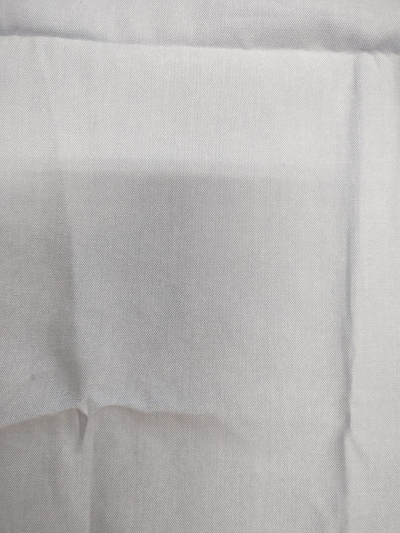

In [55]:
img_file = drive.get('1689783672.484864').read()
Image(img_file)

### Fetched image file data

In [49]:
img_file

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x05\x00\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00.\x00\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xfaV]\xe5(\x10\xb0\x00\xb0*P\x90\xd34\xa9H\xa2*\xa2\x88\xa2-3l\x05$\xd0\xcd\xa24L42\xd0\xcbP\x8a#P\xcbC6\x89`\x01(\x92\xda\xcbH\xcc\xd0\xcc\xd4\x10-\xc8\xd5\x80\x80\x00\x12\xca\x8dS\x15\x84\xb9\xb4\xcd\xb4\xcbt\xc5\xde\x8ckQl\xe7\x

In [33]:
view_img = Image(img_file)
view_img.data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x06@\x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00,\x00\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xfa\x0et\t\x1a(j&I\xa2\xa8\xaa$J\x925\x92\xa8\xa9\x06\xd1\x94Ln\x84Bh$\x1a\x8c\xd2U\x05! \x8cT\x8eP\x84\x19\x08X\xcbU\x0c%\xa8\xcaE\xa2\t\x08a\xb2\x99\xaa\x94b\xa0H\xa7yb\xa2\x9a\x82\xa2M\x19h\x91\x82\xa0f\x81\xa3-RA\xa1\x86\x88J$\x8a\xa0P\xa

### `base.get`: fetch a data row & read from Base

In [8]:
db.get('1689421467.187619')

{'Article': '150208-BAMM-CT-SF',
 'Customer': 'Aditya birla',
 'Date': '15-07-2023',
 'Defect_type': 'Patta, ',
 'PO': 'F010225562',
 'Quantity': '2801',
 'Remarks': 'Proceeded for further processing.',
 'key': '1689421467.187619'}

### `base.get`: get specific data from fetched row

In [33]:
db.get('1689421467.187619')['Remarks']

'Proceeded for further processing.'

### `base.update`: update an item value in Base

In [14]:
upd_key = '1689421467.187619'
db.update({'Quantity': '2800'}, upd_key)
db.get(upd_key)

{'Article': '150208-BAMM-CT-SF',
 'Customer': 'Aditya birla',
 'Date': '15-07-2023',
 'Defect_type': 'Patta, ',
 'PO': 'F010225562',
 'Quantity': '2800',
 'Remarks': 'Proceeded for further processing.',
 'key': '1689421467.187619'}

### Image read libraries

In [34]:
# Code from: https://stackoverflow.com/questions/18491416/pil-convert-bytearray-to-image
import os
import io
import PIL.Image as pilmage
from array import array

# def readimage(path):
#     count = os.stat(path).st_size / 2
#     with open(path, "rb") as f:
#         return bytearray(f.read())

# bytes = readimage(path+extension)
# image = Image.open(io.BytesIO(bytes))
# image.save(savepath)

### Fetch drive image data & save

In [35]:
raw_img = pilmage.open(io.BytesIO(drive.get('1689357575.939281').read()))
raw_img.save('expense_tracker_app/ignore/raw_img.jpg')

### Image quality resize

C:\Users\sinch\AppData\Local\Temp\ipykernel_2436\947441417.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resize_new_img = new_img.resize((basewidth,hsize), pilmage.ANTIALIAS)


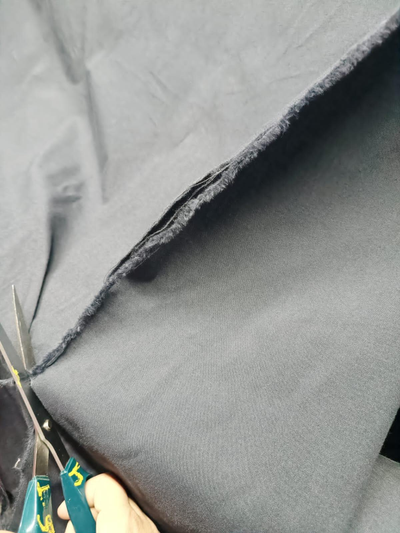

In [36]:
new_img = pilmage.open(io.BytesIO(drive.get('1689357575.939281').read()))
# set the base width of the result
basewidth = 400
# determining the height ratio
wpercent = (basewidth/float(new_img.size[0]))
hsize = int((float(new_img.size[1])*float(wpercent)))
# resize image and save
resize_new_img = new_img.resize((basewidth,hsize), pilmage.ANTIALIAS)
resize_new_img.save('expense_tracker_app/ignore/new_img.jpg')
resize_new_img

### Convert image data to byte array

In [52]:
# Code from: https://stackoverflow.com/questions/33101935/convert-pil-image-to-byte-array

img_byte_arr = io.BytesIO()
resize_new_img.save(img_byte_arr, format='PNG')
img_byte_arr = img_byte_arr.getvalue()
img_byte_arr

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x02\x15\x08\x02\x00\x00\x00pH>m\x00\x01\x00\x00IDATx\x9c\xcc\xfdW\xbf,9\x8e\'\x08\x02\xa4\x99\xb98\xe2\x8a\x10\x19*3\xbbKnu\xf5L\xff\xa6\xb7\xebi\xbf\xec\xbe\xec\xd3~\x8e\xd9\xdf\xccvOO\xcf\x94J\x11\x99!\xae<\xf7\x08\xd7n\x92\xc4>\xc0\x08\x87\x91f~\xce\x8d\xc8\xecYV\xd4M?f4\x12\x04\x81?A\x10$\xf1\xff\xf9\xff\xfe\x7f\xcd\x8aY\x91\xe5\x86\xc8\x18CDD\x04!!\x00\x12\x00\x00"\x1ac8\x03\x00H\x1e\xc9\x8f\x88\xde\xfb\xae\xeb\xda\xb6\x95\x7f\xbb\xaes\xcey\xef\x89\x883p!\x00\xe0\x9c\x03\x00c\x8c\xb5\x96\x1f\xcef3"\xaa\xeb\xda9\x97\xe7\xf9l6\xcb\xb2\x8ck\x07\x83h\x0c\x18\x04D\x04\xe0\x12B\xf2\\\x88\xb5\x16\x8d\x01\xe7\xbc\xf3\xba\tD\xc8\xe4!bDs\xdfFDn\x9d\xe4\xe1\xdf\xd6\xda.$\xe7\\\x96eL6Sk\xad\xe5\xfcDdB\xe2?\xa5\x16.\\j\xf1\xde;\xe7\x98!\\\x0b7\x84\xf3h\x92"\xda\xf8\x07\r\x93\xceFD\\\xa64D\n\x142\xb8.\xee\x0bM\x18\'\xee\x05M\xbf.\x99\xbbOs\x8f\x9f37D6\xa4\x04\xf9J\x8b\x87|n\xad\xe5\x1f\xccdy\xe5\xbd\xe7Vp\xfe,\xcb\xf8O\xef=\x7f\xa2\x

### Download & save image data in local storage from Drive

In [37]:
# for i,k in enumerate(drive.list()['names']):
#     print(k)
#     img_ = drive.get(k).read()
#     img_read = Image(img_)
#     img_decode = pilmage.open(io.BytesIO(img_read.data))
#     img_decode.save(f'.\{k}.jpg')
#     print('image saved!')

1688972072.392902
image saved!
1688983695.886027
image saved!
1689180871.386151
image saved!
1689219420.278607
image saved!
1689244421.484224
image saved!
1689316794.047651
image saved!


### Save df to csv file

In [38]:
df.to_csv("expense_tracker_app/ignore/all_defects.csv", index=False)

### Read saved csv file

In [40]:
df2 = pd.read_csv("expense_tracker_app/ignore/all_defects.csv")
df2

Article                       Customer        Date  \
0           A121A041                         Uniqlo  10-07-2023   
1           A140F896                        Aathava  10-07-2023   
2           A121A041                         Uniqlo  12-07-2023   
3           15001021                    Raymond Ltd  13-07-2023   
4           A160C084                 Indian Terrain  13-07-2023   
5           A150B321  Aditya Birla Fashion & Retail  14-07-2023   
6           A145A438                   Aditya birla  15-07-2023   
7  150208-BAMM-CT-SF                   Aditya birla  15-07-2023   

                Defect_type                      PO  Quantity  \
0                Leno break              F010225085      2442   
1                Droppings   FMW0003706, F010225309      8600   
2                  Lining,               F010225216      2886   
3             S-bowing+Skew              F0A0020764      1570   
4                    Neps,               F0A0020853      8580   
5  Loops, Temple Impression           Wvg PO: 59406      3044   
6                 Oil Stain              FMW0003716      2000   
7                   Patta,               F010225562      2800   

                                             Remarks           key  
0  Tight leno on both sides. Updated to MSML - Go...  1.689358e+09  
1                  Updated to MSML. Rolls sent back.  1.689358e+09  
2               Piece to piece warp lining observed.  1.689358e+09  
3  1.Fabric processed in stenter(2times) = No imp...  1.689358e+09  
4  Neppy appearance in melange quality. Sent for ...  1.689358e+09  
5  Pre-intimation from MSML, to check final outco...  1.689358e+09  
6  Oil Stain observed in full fabric. proceed for...  1.689421e+09  
7                  Proceeded for further processing.  1.689421e+09